<a href="https://colab.research.google.com/github/chaos44/causal/blob/main/causal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1.3 Google Colaboratoryを用いたPythonプログラミング：疑似相関の確認

本ファイルでは、1.2節で紹介した疑似相関が生まれる3パターン（因果が逆、共通の原因：交絡、合流点での選抜）を、実際にPythonでプログラミングして確認します。
プログラム実行前の設定など


In [32]:
# 乱数のシードを固定
import random
import numpy as np

random.seed(1234)
np.random.seed(1234)

In [33]:
# 使用するパッケージ（ライブラリと関数）を定義
# SciPy 平均0、分散1に正規化（標準化）関数
import scipy.stats

# 標準正規分布の生成用
from numpy.random import randn

# グラフの描画用
import matplotlib.pyplot as plt
%matplotlib inline

0. ZからYへ因果が存在する場合（通常の因果と相関）

In [15]:
# ノイズの生成
num_data = 200
e_z = randn(num_data)
e_y = randn(num_data)

# データの生成
Z = e_z
Y = 2*Z + e_y

In [16]:
# 相関係数を求める
np.corrcoef(Z, Y)

array([[1.        , 0.89379611],
       [0.89379611, 1.        ]])

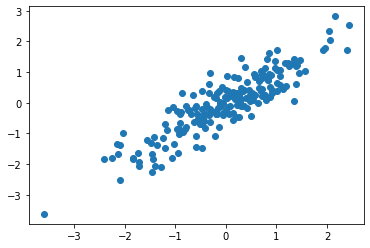

In [19]:
# 標準化
Z_std = scipy.stats.zscore(Z)
Y_std = scipy.stats.zscore(Y)

# 散布図を描画
plt.scatter(Z_std, Y_std)

1. 疑似相関：因果が逆
<br>？np.corrcoef()の引数の順番は関係ないようだ

In [24]:
# ノイズの生成
num_data = 200
e_z = randn(num_data)
e_y = randn(num_data)

# データの生成
Y = e_y
Z = 2*Y + e_z

# 相関係数を求める
np.corrcoef(Z, Y)

array([[1.       , 0.8989026],
       [0.8989026, 1.       ]])

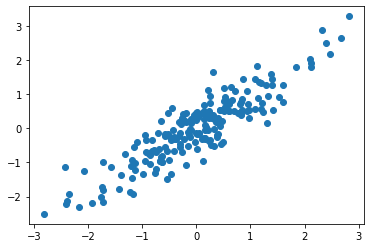

In [25]:
# 標準化
Z_std = scipy.stats.zscore(Z)
Y_std = scipy.stats.zscore(Y)

# 散布図を描画
plt.scatter(Z_std, Y_std)

2. 疑似相関：共通の原因（交絡）

In [36]:
# ノイズの生成
num_data = 200
e_x = randn(num_data)
e_y = randn(num_data)
e_z = randn(num_data)

# データの生成
Z = 3.3*e_x + e_z
Y = 3.3*e_x + e_y

# 相関係数を求める
np.corrcoef(Z, Y)

array([[1.        , 0.91963624],
       [0.91963624, 1.        ]])

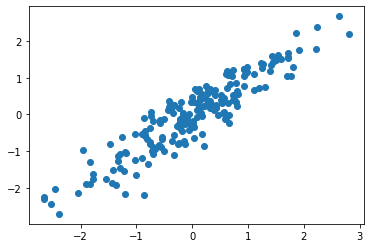

In [37]:
# 標準化
Z_std = scipy.stats.zscore(Z)
Y_std = scipy.stats.zscore(Y)

# 散布図を描画
plt.scatter(Z_std, Y_std)

3. 疑似相関：合流点での選抜

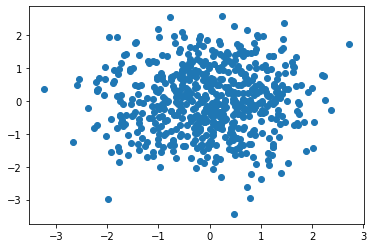

In [28]:
# ノイズの生成
num_data = 600
e_x = randn(num_data)
e_y = randn(num_data)

# データの生成 1
x = e_x
y = e_y

# 散布図を描画
plt.scatter(x, y)

In [29]:
# 相関係数を求める
np.corrcoef(x, y)

array([[1.        , 0.02845491],
       [0.02845491, 1.        ]])

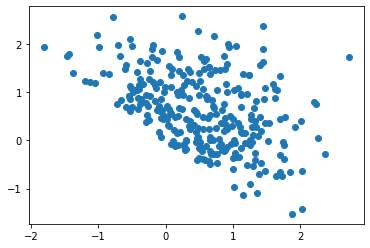

In [30]:
# 合流点を作成
z = x + y

# 新たな合流点での条件を満たす変数の用意
x_new = np.array([])
y_new = np.array([])

# zの値が0以上で選抜してnew変数に追加（append）します
for i in range(num_data):
  if z[i] > 0.0:
    x_new = np.append(x_new, x[i])
    y_new = np.append(y_new, y[i])

# 散布図を描画
plt.scatter(x_new, y_new)

In [31]:
# 相関係数を求める
np.corrcoef(x_new, y_new)

array([[ 1.       , -0.4405103],
       [-0.4405103,  1.       ]])